## Regex tries, or efficient alternations in regex

**INPUT STRING:** `Afoos,foo,food,fool-foolish, foods.`

**Initial attempts**

 1. <i>Words in any order inside the list</i><br/>
 Input: `['foo','food','fool','foods','foolish']`<br/>
 Usual `"|".join(words)` regex: `foo|food|fool|foods|foolish`<br/>
 Result: wrong matches, 29 steps - https://regex101.com/r/Pen60r/4/<br/>
 <br/>
 2. <i>Words sorted by length in descending order inside the list without word boundaries</i><br/>
 Input: `['foolish','foods','fool','food','foo']`<br/>
 Usual `"|".join(words)` regex: `foolish|foods|fool|food|foo`<br/>
 Result: `foo` still matches in `Afoos`, 95 steps (3x more!) - https://regex101.com/r/Pen60r/5<br/>
 <br/>
 3. <i>Words sorted by length in descending order inside the list with word boundaries</i><br/>
 Input: `['foolish','foods','fool','food','foo']`<br/>
 Usual `r"\b(?:{})\b".format("|".join(words))` regex: `\b(?:foolish|foods|fool|food|foo)\b`<br/>
 Result: Correct matches, 92 steps (still a lot more!) - https://regex101.com/r/Pen60r/6<br/>
<br/>
 4. <i>The regex trie based pattern, `\b(?:foo(?:l(?:ish)?|ds?)?)\b`, finds correct matches within **67 steps**, see 
https://regex101.com/r/Pen60r/7<i>.


## What is a trie?

"A trie is a type of search tree, a tree data structure used for locating specific keys from within a set. These keys are most often strings, with links between nodes defined not by the entire key, but by individual characters. In order to access a key (to recover its value, change it, or remove it), the trie is traversed depth-first, following the links between nodes, which represent each character in the key." — _Wikipedia_

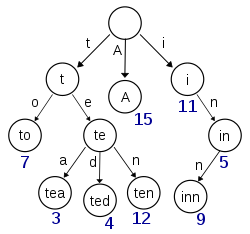

This is a trie for keys "A", "to", "tea", "ted", "ten", "i", "in", and "inn". 

A *regex trie* is a regular expression that is built in a trie-like way: 

    (?:foo(?:l(?:ish)?|ds?)?)
    
This expression scheme is

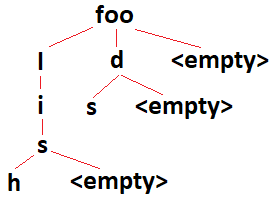

## How can we generate this kind of pattern in Python?

You can use some ready-to-use library, like a trieregex library (https://github.com/ermanh/trieregex).

In [18]:
# pip install trieregex or pip3 install trieregex
from trieregex import TrieRegEx
words = ['foo','food','fool','foods','foolish'] # Any order of words in the list
print( fr'\b(?:{TrieRegEx(*words).regex()})\b' )

\b(?:foo(?:l(?:ish)?|ds?)?)\b


## Testing

Let's try to run this regex against this sample text.

In [23]:
import re
from trieregex import TrieRegEx

text = """“Poem for the Fools”, by Franziska Von Karma
Foolish fool who foolishly dreams of foolish dreams
I grow tired of the foolish foolery of the foolish fools of this foolish country
A fool is a fool who will only listen to the foolish opinions of other foolish fools
There's no need for foolish outcries from foolishly foolish fools
Foolish fool spouting foolish foolishness, just as I expect of a foolish fool such as you
Oh, how a foolish fool makes a foolish face while dreaming foolishly foolish dreams
Don't be foolish, you foolish fool wearing the foolishly foolish clothes
Yet again the foolish fool spouts out more foolishly foolish drabble
A foolish fool with a foolish sieve for a brain only speaks foolishly with foolish words
I'm inclined to feel sorry for a foolish fool who foolishly spends his time foolishly."""

# Create the words list from the text words
words = list(set(re.findall(r'[^\W\d_]+', text)))
print(f"Words: {words}\n")

non_trie_pattern = fr'\b(?:{"|".join(sorted(words,key=len,reverse=True))})\b'
trie_pattern     = fr'\b(?:{TrieRegEx(*words).regex()})\b'

re_notriepattern = re.compile( non_trie_pattern )
re_triepattern = re.compile( trie_pattern )

print(f"Non-trie pattern: {non_trie_pattern}\n")
print(f"Trie pattern: {trie_pattern}\n")

Words: ['Yet', 's', 'foolishness', 'be', 'Poem', 'you', 'for', 'as', 'sieve', 'to', 'Franziska', 'a', 'words', 'outcries', 'dreaming', 'is', 'this', 'from', 'face', 'with', 'Von', 'm', 'only', 'spends', 'foolery', 'his', 'by', 'no', 'just', 'feel', 'sorry', 'Oh', 'fools', 'I', 'listen', 'foolishly', 'grow', 'There', 'drabble', 'the', 'A', 'more', 'other', 'fool', 'brain', 'who', 'will', 'wearing', 'country', 'spouting', 'makes', 'opinions', 'need', 'spouts', 'tired', 't', 'while', 'Foolish', 'foolish', 'such', 'how', 'Don', 'time', 'dreams', 'speaks', 'Karma', 'inclined', 'expect', 'out', 'Fools', 'of', 'again', 'clothes']

Non-trie pattern: \b(?:foolishness|Franziska|foolishly|outcries|dreaming|spouting|opinions|inclined|foolery|drabble|wearing|country|Foolish|foolish|clothes|spends|listen|spouts|dreams|speaks|expect|sieve|words|sorry|fools|There|other|brain|makes|tired|while|Karma|Fools|again|Poem|this|from|face|with|only|just|feel|grow|more|fool|will|need|such|time|Yet|you|for|Von|h

In [25]:
# Test
print("No trie-based re pattern:")
%timeit -n 10000 re_notriepattern.findall(text)
print("Trie-based re pattern:")
%timeit -n 10000 re_triepattern.findall(text)

No trie-based re pattern:
79.5 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Trie-based re pattern:
53.7 µs ± 970 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## FURTHER LINKS

 - [What is a Trie](https://en.wikipedia.org/wiki/Trie) (Wikipedia article)
 - [How to have better and clear regex expression in Javascript](https://stackoverflow.com/a/68275882/3832970) - Generate regex tries from your static word lists using the code snippet in this StackOverflow answer of mine
 - [Speed up millions of regex replacements in Python 3](https://stackoverflow.com/a/42789508/3832970) (StackOverflow Python solution)
 - [Match a list of words preceded and followed by some special character](https://stackoverflow.com/a/69226462/3832970) (a tweak of the above StackOverflow Python solution using custom boundaries)
 - [Fuzzy regex match on million rows Pandas df](https://stackoverflow.com/a/65289273/3832970) (a tweak of the above StackOverflow Python solution for using in Pandas with PyPi regex module and whitespace boundaries)
 - [Emoji regex for .NET, JavaScript](https://stackoverflow.com/a/48148218/3832970) - StackOverflow regex solution to match emojis generated with the trie approach
 